In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
#train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
#train = pd.read_csv(train_url)

#test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
#test = pd.read_csv(test_url)

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'
train["Embarked"] = train["Embarked"].fillna(train["Embarked"] == "S")
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [8]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

In [9]:
from sklearn.ensemble import RandomForestClassifier

features_one = train[["Pclass", "Sex", "Age", "Fare"]].values
target = train["Survived"]

forest = RandomForestClassifier(max_depth = 10, min_samples_split=4, n_estimators = 100, random_state = 1)
forest_one = forest.fit(features_one, target)


print(forest_one.score(features_one, target))
print(forest_one.feature_importances_)

0.9371492704826038
[0.12151628 0.3466642  0.23399449 0.29782503]


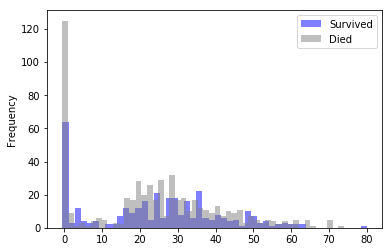

In [34]:
import matplotlib.pyplot as plt

Survived = train[train["Survived"] == 1]
Died = train[train["Survived"] == 0]
Survived["Age"].plot.hist(alpha=0.5, color = 'blue', bins = 50)
Died["Age"].plot.hist(alpha=0.5, color = 'gray', bins = 50)
plt.legend(["Survived", "Died"])
plt.show()

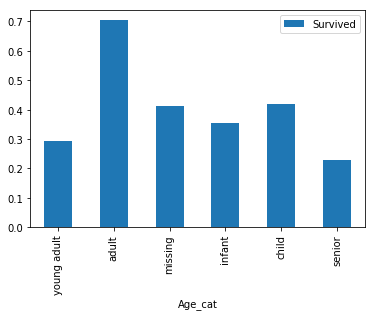

In [12]:
def cut_age(df, bins, cat):
    train["Age"] = train["Age"].fillna(-0.5)    
    df["Age_cat"] = pd.cut(train["Age"], bins, labels = cat)
    return df

bins = [-1,0,5,18,30,60,100]
cat = ["missing","infant","child", "young adult", "adult","senior"]

train = cut_age(train, bins, cat)
test = cut_age(test, bins, cat)

pivot = train.pivot_table(index="Age_cat",values='Survived')
pivot.plot.bar()
plt.show()

In [14]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex","Age_cat"]:
    train = create_dummies(train,column)
    test = create_dummies(test,column)

In [32]:
pd.get_dummies(train["Sex"], prefix = "Sex")
pd.get_dummies(test["Sex"], prefix = "Sex")

train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_2,Pclass_3,Sex_0,Sex_1,Age_cat_missing,Age_cat_infant,Age_cat_child,Age_cat_young adult,Age_cat_adult,Age_cat_senior
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,...,0,1,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,...,0,0,0,1,0,0,0,0,1,0


In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

columns = [ 'Age_cat_missing','Age_cat_infant',
       'Age_cat_child',
       'Age_cat_young adult', 'Age_cat_adult',
       'Age_cat_senior', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1']
#^^^ can I do this with slicing!!? I can't figure it out with the "columns" selector bcs it seems to work differently

lr.fit(train[columns], train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
scores = cross_val_score(lr, train[columns], train["Survived"], cv=12)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.75675676 0.75675676 0.76712329 0.78082192 0.78378378 0.78666667
 0.8        0.8        0.81333333 0.81333333 0.82191781 0.88      ]
0.7967078036941051


In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_cat_missing,Age_cat_infant,Age_cat_child,Age_cat_young adult,Age_cat_adult,Age_cat_senior
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,1,0,1,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,1,1,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,0,0,1,0,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,0,1,0,1,0,0,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,1,1,0,0,0,0,0,1,0


In [36]:
test.rename(columns={'Sex_female': 'Sex_1', 'Sex_male': 'Sex_0'}, inplace=True)

In [37]:
columns = [ 'Age_cat_missing','Age_cat_infant',
       'Age_cat_child',
       'Age_cat_young adult', 'Age_cat_adult',
       'Age_cat_senior', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0' , 'Sex_1']

lr = LogisticRegression()
lr.fit(train[columns], train['Survived'])

test_predictions = lr.predict(test[columns])


In [43]:
test_ids = test["PassengerId"]
first_submission = {"PassengerId": test_ids,
              "Survived": test_predictions}

first_submission = pd.DataFrame(first_submission)

In [44]:
first_submission.to_csv("first_submission", index = False)

In [46]:
first_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB
